In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

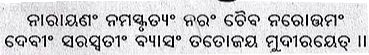

## Motivation

Before beginning writing, the authors of this book, like much of the workforce, had to become caffeinated. We hopped in the car and started driving. Using an iPhone, Alex called out “Hey Siri,” awakening the phone’s voice recognition system. Then Mu commanded, “Directions to Blue Bottle coffee shop.” The phone quickly displayed the transcription of his command. It also recognized that we were asking for directions and launched the Maps application (app) to fulfill our request. Once launched, the Maps app identified a number of routes. Next to each route, the phone displayed a predicted transit time.

While we fabricated this story for pedagogical convenience, it demonstrates that in the span of just a few seconds, our everyday interactions with a smartphone can engage several machine learning models. Imagine just writing a program to respond to a wake word such as “Alexa,” “OK Google,” or “Hey Siri.” Try coding it up in a room by yourself with nothing but a computer and a code editor. How would you write such a program from first principles? Think about it... the problem is hard.

Every second, the microphone will collect roughly 44,000 samples. Each sample is a measurement of the amplitude of the sound wave. What rule could map reliably from a snippet of raw audio to confident predictions `{yes, no}` on whether the snippet contains the wake word? If you are stuck, do not worry. We do not know how to write such a program from scratch either. That is why we use **machine learning**.

Here is the trick: often, even when we do not know how to tell a computer explicitly how to map from inputs to outputs, we are nonetheless capable of performing the cognitive feat. Machine learning allows us to bridge this gap by learning from data.

## Machine Learning Process

Even if you do not know how to program a computer to recognize the word “Alexa,” you are able to recognize it yourself. Armed with this ability, we can collect a huge dataset containing examples of audio snippets and associated labels, indicating which snippets contain the wake word. 

In the dominant approach to machine learning, we do not attempt to design a system explicitly to recognize wake words. Instead, we define a flexible program whose behavior is determined by a number of parameters. Then, we use the dataset to determine the best possible parameter values — those that improve the program's performance with respect to a chosen performance measure. You can think of the parameters as knobs that we can turn, manipulating the program’s behavior.

Once we fix the parameters, the program becomes a model. The set of all distinct programs (input-output mappings) that we can produce just by manipulating the parameters is called a **family of models**. The meta-program that uses our dataset to choose the parameters is known as a **learning algorithm**.

Before engaging the learning algorithm, we must define the problem precisely. This includes pinning down the exact nature of the inputs and outputs and choosing an appropriate model family. In this case, our model receives a snippet of audio as input and generates a selection among `{yes, no}` as output. If all goes well, the model should correctly predict whether the snippet contains the wake word. 

If we choose the right family of models, there should exist one configuration of the knobs such that the model fires “yes” every time it hears the word “Alexa.” Likewise, we expect that another configuration could be tuned to fire “yes” only upon hearing the word “Apricot.” Both tasks—recognizing “Alexa” and “Apricot”—are similar, so the same family of models can handle them. However, for fundamentally different tasks, like mapping from images to captions or from English to Chinese sentences, we might need a different family of models entirely.

If we were to set all of the knobs randomly, the model likely wouldn’t recognize "Alexa," "Apricot," or any other word. In machine learning, the process of **learning** is how we discover the right configuration of the knobs to produce the desired behavior. In other words, we train our model with data.

### Training Process
As depicted in Fig. 1, the typical steps for training a model are:

1. **Start with a randomly initialized model** that cannot perform useful tasks.
2. **Grab some data**, such as audio snippets and their corresponding `{yes, no}` labels.
3. **Adjust the parameters (knobs)** to make the model perform better, based on those examples.
    
 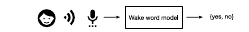
 
 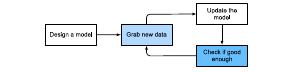
 Fig .1 . A typical training process.
 
 ## 1.2 Key Components

In our wake word example, we described a dataset consisting of audio snippets and binary labels. We provided a rough idea of how we might train a model to approximate a mapping from snippets to classifications. This type of problem, where we aim to predict an unknown label based on known inputs using a dataset of labeled examples, is called **supervised learning**. 

Supervised learning is just one of many types of machine learning problems. Before we dive into other varieties, it’s important to highlight some **core components** that will be present in any machine learning problem we tackle:

1. **The data** that we can learn from.
2. **A model** that transforms the data.
3. **An objective function** that quantifies how well (or poorly) the model is performing.
4. **An algorithm** to adjust the model’s parameters to optimize the objective function.


## 1.2.1 Data

It goes without saying that you cannot do data science without **data**. While we could spend hundreds of pages pondering the precise definition of data, for now, we will focus on the key properties of datasets that concern us.

Generally, we deal with a **collection of examples**. To work with data effectively, we typically need to represent it numerically. Each example (or data point, data instance, or sample) consists of a set of attributes called **features** (sometimes referred to as covariates or inputs), based on which the model makes predictions.

In **supervised learning** problems, the goal is to predict a special attribute called the **label** (or target), which is not part of the model’s input. For example:

- If we were working with image data, each example might consist of a photograph (the features) and a label indicating the category of the photograph. The photograph would be numerically represented as grids of values corresponding to the brightness of red, green, and blue light at each pixel location. A 200 × 200 color image would thus have 200 × 200 × 3 = 120,000 numerical values.
- For electronic health records, we might predict the likelihood of a patient's survival over the next 30 days based on features like age, vital signs, comorbidities, medications, and procedures. The label could be a binary value indicating survival.

When every example has the same number of numerical features, we say the inputs are **fixed-length vectors**, and the dimensionality is the constant length of these vectors. Fixed-length inputs are convenient but not always available. For instance:

- Images from the Internet might vary in resolution or shape, unlike standard equipment images.
- Text data can vary significantly in length (e.g., short vs. long customer reviews).

One of deep learning's major advantages is its ability to handle **varying-length data** gracefully.

### The Importance of Data Quality

Having more data makes it easier to train more powerful models. The shift from small data to **big data** has fueled much of deep learning's success. However, we must ensure that we have the **right data**. If the data is full of mistakes or the chosen features are irrelevant, the learning process will fail. The saying "garbage in, garbage out" holds true.

Poor data quality can have severe consequences, especially in sensitive applications like **predictive policing**, **resume screening**, or **lending risk models**. For example, if a skin cancer recognition system has never encountered black skin, it could fail when applied to diverse populations. Furthermore, historical biases in data could cause models to perpetuate societal injustices, such as in hiring decisions.

---

## 1.2.2 Models

Most machine learning tasks involve **transforming data**. For example, we might build a system that ingests photos and predicts whether someone is smiling or a system that ingests sensor readings and predicts anomalies. 

By **model**, we refer to the computational machinery for processing data of one type and producing predictions of a possibly different type. Machine learning models are typically **statistical models** that can be estimated from data.

While traditional models handle simple problems, **deep learning** focuses on more powerful models that perform successive transformations of data, hence the term "deep." These models address complex problems where classical methods may fall short. We'll discuss both **deep models** and more **traditional methods** in this book.

---

## 1.2.3 Objective Functions

In machine learning, **learning** means improving performance on a task over time. To determine whether an update to a model constitutes an improvement, we need a formal measure of performance called an **objective function** (or **loss function** when lower values are better).

For example:
- For **regression tasks**, the most common loss function is **squared error**, which is the square of the difference between the prediction and the true value.
- For **classification tasks**, the objective might be to minimize the **error rate**, i.e., the fraction of incorrect predictions.

Some objectives, like squared error, are easy to optimize, while others, like error rate, are more complex due to **non-differentiability** or other issues. In such cases, we often optimize a **surrogate objective**.

### Training vs. Testing

When optimizing a model, we minimize the loss on a **training dataset**. However, good performance on training data doesn’t guarantee generalization to new, unseen data. Therefore, we usually split the data into:
1. **Training set** – used for learning model parameters.
2. **Test set** – held out for evaluating performance on unseen data.

A model that performs well on the training set but fails on the test set is said to be **overfitting** to the training data.

---

## 1.2.4 Optimization Algorithms

Once we have data, a model, and a well-defined objective function, we need an **optimization algorithm** to adjust the model’s parameters to minimize the loss function.

The most popular optimization algorithm in deep learning is **gradient descent**. At each step, this algorithm checks how the training loss would change if each parameter is adjusted slightly. It then updates the parameters in the direction that reduces the loss.

---

## 1.3 Kinds of Machine Learning Problems

The wake word problem in our example is just one of many problems that machine learning can address. Below, we provide a broad overview of the main categories of machine learning problems to give us some common language throughout the book.

---

### 1.3.1 Supervised Learning

Supervised learning tasks involve a dataset with both features and labels. The goal is to produce a model that can predict the label given the input features.

### 1.3.1.1 Supervised Learning Process

A **feature-label pair** is called an **example**. Sometimes, when the context is clear, we may use the term **examples** to refer to a collection of inputs, even when the corresponding labels are unknown. The term **supervised learning** comes from the fact that during training, we (the supervisors) provide the model with a dataset consisting of **labeled examples**.

In **probabilistic terms**, supervised learning typically involves estimating the **conditional probability** of a label given the input features. Although it is only one of several paradigms in machine learning, supervised learning dominates successful applications in industry. This is largely due to the fact that many important tasks can be framed as **estimating the probability** of something unknown based on a particular set of data. Examples include:

- Predicting **cancer** vs. **not cancer**, given a computer tomography image.
- Predicting the correct **translation** in French, given a sentence in English.
- Predicting the **stock price** next month based on this month’s financial reporting data.

### Diverse Forms of Supervised Learning

While all supervised learning problems can be described as "predicting labels given input features," they take diverse forms and require numerous modeling decisions depending on factors such as:

- **Type** of input data (e.g., images, text, or numerical data).
- **Size** and **quantity** of inputs.
- Whether the input consists of **fixed-length vectors** or **arbitrary-length sequences**.

We'll explore various supervised learning problems in detail throughout this book.

### Learning Process

Informally, the **learning process** in supervised learning follows these steps:

1. **Collect a large dataset** of examples where the features are known.
2. **Select a random subset** of these examples, ensuring that you acquire the **ground-truth labels** for each example. Labels might already be available (e.g., "did the patient die within the year?") or may require **human annotation** (e.g., categorizing images).
3. Together, these inputs and labels make up the **training set**.
4. Feed the training set into a **supervised learning algorithm**, which is a function that takes as input the dataset and outputs another function: the **learned model**.
5. After training, the model can then be applied to **previously unseen inputs** to generate **predictions** of the corresponding labels.

The **full process** is depicted in **Figure 1.3.1**.

---
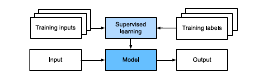
**Figure 1.3.1: Supervised Learning Process Overview**
### 1.3.2 Regression

Perhaps the simplest supervised learning task to understand is **regression**. Consider a set of data gathered from a database of home sales. Each **row** in a table might correspond to a different house, and each **column** might correspond to a relevant attribute (or feature), such as:

- **Square footage**
- **Number of bedrooms**
- **Number of bathrooms**
- **Walking distance** to the town center

For example, in cities like New York or San Francisco, if you're not a CEO, your feature vector for home attributes might look something like `[600, 1, 1, 60]`. On the other hand, if you live in Pittsburgh, it could be more like `[3000, 4, 3, 10]`. In regression tasks, the feature vector represents a **fixed-length vector** for each house, which is essential for many classic machine learning algorithms.

The distinguishing factor in regression is the nature of the **target** (label). For instance, if you're trying to **estimate the market value of a house** given its features, the target is a **numerical value**, which makes this a **regression problem**. The goal is to create a model whose predictions closely match the observed values (labels).

#### Examples of Regression Problems

- Predicting the **rating** a user will assign to a movie
- Predicting the **length of stay** for hospital patients
- Estimating **surgery duration** or **future rainfall** 

A rule of thumb is that any **how much?** or **how many?** question suggests regression. These tasks can be tackled with models that minimize the **squared error loss function**, which assumes that the data may have been affected by Gaussian noise.

### 1.3.3 Classification

While regression focuses on predicting numerical values, **classification** addresses **which one?** problems. For example, consider a bank developing a **check-scanning feature** for its mobile app. After isolating each handwritten character from the image of the check, the task is to **determine which character** is represented in each patch of the image.

In classification tasks, we aim to predict the **category** (or class) to which an example belongs. For instance, if the goal is to classify handwritten digits, there might be **ten possible classes** corresponding to digits 0 through 9. The simplest classification problem is **binary classification**, where there are only **two possible classes**, such as predicting whether an image contains a **cat** or a **dog**.

#### Examples of Classification Problems

- Predicting **cat vs. dog** from images
- Classifying **handwritten characters** (e.g., {0, 1, 2, ..., 9, a, b, c, ...})

In classification, rather than predicting a numerical value (as in regression), we predict the **class assignment**. To make this task more manageable, we often express the model’s output as a set of **probabilities** across all possible classes. For example, a classifier might assign a 90% probability that an image contains a cat.

#### Multiclass Classification

When there are more than two possible classes, we refer to it as a **multiclass classification** problem. A common example includes **handwritten character recognition** for digits and letters.

In classification problems, the **cross-entropy loss function** is commonly used. It provides a way to evaluate how well the predicted probability distribution matches the actual labels. We'll explore **information theory** and cross-entropy in more detail in later chapters.

---

**Fig.3: An example of a mushroom image used for classification.**
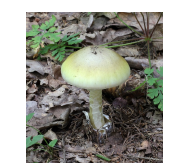
Fig 3. Is it an Umnbrella or a Hat?



### 1.3.4 Hierarchical Classification

While **binary** and **multiclass classification** are common, some tasks require more nuanced approaches, such as **hierarchical classification**. In hierarchical classification, the classes are structured in a hierarchy, and **not all errors are equal**. For example, it might be less harmful to misclassify a **poodle** as a **schnauzer** than to classify it as a **dinosaur**.

In some domains, the relevant hierarchy is determined by how the model will be used. For instance:

- Misclassifying a **rattlesnake** as a **garter snake** could have **deadly consequences**, even though they are close phylogenetically.
- In contrast, the same mistake might be harmless in a taxonomy-based classification without real-world implications.

This concept is crucial when designing models for fields such as **biology** or **medicine**, where the cost of misclassification varies based on the **relationship between classes**.

### 1.3.5 Decision Theory in Classification

When making decisions based on classification models, it's essential to consider the **disutility** associated with each potential action. For example, consider the case of a **mushroom classifier**:

- Assume we built a classifier to predict whether a mushroom is poisonous. If it outputs a **0.2 probability** that the mushroom is a **death cap** and an **0.8 probability** that it is safe to eat, the decision is not straightforward.
- The risk associated with eating a poisonous mushroom (a **death cap**) is far greater than the benefit of consuming it for dinner.

To make the decision, we calculate the **expected disutility**:

- **Eating the mushroom**:
  - Disutility = `0.2 × ∞ + 0.8 × 0 = ∞` (due to the chance of death)
- **Discarding the mushroom**:
  - Disutility = `0.2 × 0 + 0.8 × 1 = 0.8` (mild loss from not eating)

Clearly, the safer choice is to **discard the mushroom**, as any mycologist would recommend, given the potential dangers of a **death cap**.

### 1.3.6 Tagging

Sometimes classification problems don’t fit neatly into the **binary** or **multiclass** setups. For example, consider a scenario where multiple labels can apply simultaneously, such as an image that contains **multiple objects**. This problem is known as **tagging**.

#### Example: The Town Musicians of Bremen

The fairy tale *The Town Musicians of Bremen* features four animals—**a cat, a rooster, a dog, and a donkey**—standing on top of each other (as depicted in Fig. 1.3.3). Suppose we are asked to classify this image:

- A traditional binary classifier trained to distinguish **cats** from **dogs** would struggle with this image, as it contains multiple animals.
- A more sophisticated tagging model could label the image with **multiple categories**, identifying each animal: cat, dog, rooster, and donkey.

This type of problem arises often in **object detection**, **image recognition**, and **natural language processing** tasks where multiple **labels** or **tags** are necessary to fully describe an example.


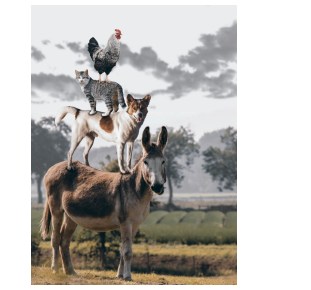
Fig. 4. A donkey, a dog, a cat, and a rooster.

### Recommender Systems and Search

In the field of **information retrieval**, we often impose rankings over sets of items. For example, take web search—the goal is less about determining whether a particular page is relevant for a query, but rather, which among the relevant results should be shown most prominently. One possible solution might be to first assign a score to every element in the set and retrieve the top-rated elements.

For example, **PageRank** is a scoring system initially used by Google, where the relevance of a page was determined by how many other pages linked to it, providing a measure of authority. Peculiarly, this scoring did not depend on the actual query. Nowadays, machine learning and behavioral models are used to obtain **query-dependent** relevance scores.

### Recommender Systems

Recommender systems are similar to search, but they focus more on **personalization**. For instance, recommendations for a science fiction fan will differ significantly from those for a Peter Sellers comedy fan. Systems can use **explicit feedback** such as ratings or **implicit feedback**, like skipping songs in a playlist.

In the simplest terms, recommender systems estimate a score $ \hat{r}_{ui} $ for a user $ u $ and an item $ i $, with the goal of maximizing user satisfaction:

$$ \hat{r}_{ui} = f(u, i) $$

where $ f(u, i) $ is the learned function predicting user $ u $'s interaction with item $ i $.

#### Collaborative Filtering

Collaborative filtering methods use either **user-based** or **item-based** techniques:

1. **User-based Collaborative Filtering**: Find users similar to the target user and recommend items they have liked.
   
$$ \hat{r}_{ui} = \frac{\sum_{v \in \text{Users}} \text{sim}(u, v) \cdot r_{vi}}{\sum_{v \in \text{Users}} \text{sim}(u, v)} $$

2. **Item-based Collaborative Filtering**: Find items similar to the ones a user has interacted with and recommend them.

$$ \hat{r}_{ui} = \frac{\sum_{j \in \text{Items}} \text{sim}(i, j) \cdot r_{uj}}{\sum_{j \in \text{Items}} \text{sim}(i, j)} $$

#### Ranking and Scoring

In recommender systems and search, **ranking algorithms** prioritize results. These algorithms aim to maximize relevance, diversity, novelty, and serendipity. In modern systems, **deep learning** is widely used to improve these rankings.

For instance, the recommendation score could be defined as:

$$ \hat{y} = \text{softmax}(W_x^T x + b_x) $$

where $ W_x $ is the weight matrix, $ x $ the input features, and $ b_x $ the bias term. This neural network model predicts the probability distribution of items to recommend based on the input features.

### Limitations of Recommender Systems

Recommender systems face several limitations:

- **Selection Bias**: Users rate items they feel strongly about, leading to a bias in the training data.
  
- **Cold Start Problem**: New users or new items lack interaction data, making recommendations difficult.

- **Censored Feedback**: Implicit feedback (e.g., skipping a song) is abundant but ambiguous. For example, skipping a song may not indicate dissatisfaction but rather context-inappropriateness.

### Conclusion

Recommender systems have advanced significantly with the adoption of **machine learning** and **deep learning**, but challenges like bias, cold-start, and personalization remain active areas of research.


### Sequence Learning

So far, we have looked at problems where we have some fixed number of inputs and produce a fixed number of outputs. For example, we considered predicting house prices given a fixed set of features: square footage, number of bedrooms, number of bathrooms, and the transit time to downtown. We also discussed mapping from an image (of fixed dimension) to the predicted probabilities that it belongs to each among a fixed number of classes and predicting star ratings associated with purchases based on the user ID and product ID alone. 

In these cases, once our model is trained, after each test example is fed into our model, it is immediately forgotten. We assumed that successive observations were independent and thus there was no need to hold on to this context. But how should we deal with video snippets? In this case, each snippet might consist of a different number of frames. Our guess of what is going on in each frame might be much stronger if we take into account the previous or succeeding frames. 

The same goes for language. One popular deep learning problem is **machine translation**: the task of ingesting sentences in some source language and predicting their translations in another language. These problems also occur in medicine. We might want a model to monitor patients in the intensive care unit and to fire off alerts whenever their risk of dying in the next 24 hours exceeds some threshold. Here, we would not throw away everything that we know about the patient history every hour, making predictions based only on the most recent measurements.

These problems are among the most exciting applications of machine learning and they are instances of **sequence learning**. They require a model to either ingest sequences of inputs or to emit sequences of outputs (or both). Specifically, **sequence-to-sequence learning** considers problems where inputs and outputs both consist of variable-length sequences. Examples include machine translation and speech-to-text transcription.

#### Special Cases of Sequence Learning

1. **Tagging and Parsing**: This involves annotating a text sequence with attributes. Here, the inputs and outputs are aligned, i.e., they are of the same number and occur in a corresponding order. For instance, in **part-of-speech (PoS) tagging**, we annotate every word in a sentence with the corresponding part of speech, i.e., “noun” or “direct object”. Alternatively, we might want to know which groups of contiguous words refer to named entities, like people, places, or organizations. In a cartoonishly simple example below, we might just want to indicate, for every word in a sentence, whether it is part of a named entity (tagged as “Ent”).

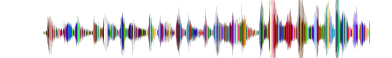
Fig.4 -D-e-e-p- L-ea-r-ni-ng- in an audio recording.
